In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [125]:
data = pd.read_csv('data/speeddating.csv').drop(columns=['d_d_age'])

In [126]:
data = data.assign(
    gender = data.gender.map(lambda x: x[2:-1]),
    race = data.race.map(lambda x: x[2:-1]),
    race_o = data.race_o.map(lambda x: x[2:-1]),
    samerace = data.samerace.map(lambda x: x[2:-1]),
    match = data.match.map(lambda x: x[2:-1]),
    field = data.field.map(lambda x: x[2:-1])
).drop(columns=['has_null'])

In [127]:
data = data[[c for c in data.columns if not c.startswith('d_')]]

# Preprocessing

Remove dates from waves with different rules (different preference scales, only allowed to say yes to 50% of people met

In [128]:
data = data[data.wave.isin([1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 11.0, 13., 14., 15., 16., 17., 18.,
 19., 20., 21.])]

## Deal with nans

In [129]:
data.isna().sum().sort_values(ascending=False)

expected_num_interested_in_me    4624
shared_interests_o                814
shared_interests_partner          805
ambitous_o                        576
ambition_partner                  566
                                 ... 
field                               0
samerace                            0
race_o                              0
race                                0
match                               0
Length: 66, dtype: int64

Drop 'expected_num_interested_in_me' column - over70% of the values are NaN

In [130]:
data = data.drop(columns=['expected_num_interested_in_me'])

In [131]:
data.isna().sum().sort_values(ascending=False)

shared_interests_o          814
shared_interests_partner    805
ambitous_o                  576
ambition_partner            566
expected_num_matches        538
                           ... 
field                         0
samerace                      0
race_o                        0
race                          0
match                         0
Length: 65, dtype: int64

In [132]:
'''
# Column meanings: 

# 
- About me:
    field
- Important to me:
    importance_same_race, importance_same_religion, attractive_important, sincere_important, 
    intellicence_important, funny_important, ambition_important, shared_interests_important
- Important to partner:
    pref_o_attractive, pref_o_sincere, pref_o_intelligence, pref_o_funny, pref_o_ambitious, pref_o_shared_interests
- Rating by partner about me:
    attractive_o, sinsere_o, intelligence_o, funny_o, ambitious_o, shared_interests_o
- Rate myself:
    attractive, sincere, intelligence, funny, ambition
- Rate my partner:
    attractive_partner, sincere_partner, intelligence_partner, funny_partner, ambition_partner,
    shared_interests_partner
- My interests:
    sports, tvsports, exercise, dining, museums, art, hikinh, gaming, clubbing, reading, tv, theater,
    movies, concerts, music, shopping, yoga
- About the date:
    interests_correlate, expected_happy_with_sd_people, expected_num_matches, like,
    guess_prob_liked, met, decision, match
'''

'\n# Column meanings: \n\n# \n- About me:\n    field\n- Important to me:\n    importance_same_race, importance_same_religion, attractive_important, sincere_important, \n    intellicence_important, funny_important, ambition_important, shared_interests_important\n- Important to partner:\n    pref_o_attractive, pref_o_sincere, pref_o_intelligence, pref_o_funny, pref_o_ambitious, pref_o_shared_interests\n- Rating by partner about me:\n    attractive_o, sinsere_o, intelligence_o, funny_o, ambitious_o, shared_interests_o\n- Rate myself:\n    attractive, sincere, intelligence, funny, ambition\n- Rate my partner:\n    attractive_partner, sincere_partner, intelligence_partner, funny_partner, ambition_partner,\n    shared_interests_partner\n- My interests:\n    sports, tvsports, exercise, dining, museums, art, hikinh, gaming, clubbing, reading, tv, theater,\n    movies, concerts, music, shopping, yoga\n- About the date:\n    interests_correlate, expected_happy_with_sd_people, expected_num_matche

In [133]:
data = data.loc[data.index[data.isna().sum(axis=1).sort_values(ascending=False)<26]]

In [134]:
important_to_me = data[['attractive_important', 'sincere_important', 
    'intellicence_important', 'funny_important', 'shared_interests_important', 'ambtition_important']]

Remove instances with no information about personal preferences: (74 instances)

In [135]:
important_to_me = important_to_me[~important_to_me.isna().all(axis=1)]

In [136]:
data = data.loc[important_to_me.index]
data.head()

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,...,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
74,1.0,female,25.0,24.0,European/Caucasian-American,Latino/Hispanic American,0,1.0,1.0,Masters in Public Administration,...,6.0,-0.23,6.0,NaN,6.0,5.0,0.0,b'1',b'1',1
75,1.0,female,25.0,25.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,0.28,6.0,NaN,6.0,5.0,0.0,b'1',b'1',1
76,1.0,female,25.0,30.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,0.05,6.0,NaN,6.0,6.0,0.0,b'1',b'0',0
77,1.0,female,25.0,27.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,0.17,6.0,NaN,5.0,4.0,0.0,b'1',b'1',1
78,1.0,female,25.0,28.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,-0.47,6.0,NaN,7.0,10.0,0.0,b'1',b'1',1


In [137]:
important_to_me.columns

Index(['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'shared_interests_important', 'ambtition_important'],
      dtype='object')

Fill leftover importance levels w 0 (the rest already sum up to 100):

In [138]:
data = data.fillna({'attractive_important':0, 'sincere_important':0, 'intellicence_important':0,
       'funny_important':0, 'shared_interests_important':0, 'ambtition_important':0})

###### important to partner:

In [139]:
important_to_p = data[[
    'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
    'pref_o_shared_interests'
]]

In [140]:
important_to_p = important_to_p[~important_to_p.isna().all(axis=1)]
important_to_p.head()

,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests
74,30.00,10.00,20.00,10.00,10.00,20.00
75,50.00,0.00,30.00,10.00,0.00,10.00
76,35.00,15.00,25.00,10.00,5.00,10.00
77,33.33,11.11,11.11,11.11,11.11,22.22
78,50.00,0.00,25.00,10.00,0.00,15.00


In [141]:
data = data.loc[important_to_p.index].fillna({
    'pref_o_attractive':0, 'pref_o_sincere':0, 'pref_o_intelligence':0,
       'pref_o_funny':0, 'pref_o_ambitious':0, 'pref_o_shared_interests':0
})

##### Rating by partner about me:

In [142]:
ratings_for_me = data[['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o']]
ratings_for_me.head()

,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o
74,9.0,9.0,8.0,9.0,NaN,7.0
75,8.0,7.0,7.0,7.0,8.0,7.0
76,6.0,4.0,7.0,5.0,6.0,4.0
77,9.0,8.0,8.0,8.0,7.0,5.0
78,8.0,7.0,8.0,10.0,8.0,10.0


In [143]:
ratings_for_me = ratings_for_me[~ratings_for_me.isna().all(axis=1)]
ratings_for_me.head()

,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o
74,9.0,9.0,8.0,9.0,NaN,7.0
75,8.0,7.0,7.0,7.0,8.0,7.0
76,6.0,4.0,7.0,5.0,6.0,4.0
77,9.0,8.0,8.0,8.0,7.0,5.0
78,8.0,7.0,8.0,10.0,8.0,10.0


In [144]:
data = data.loc[ratings_for_me.index]
data = data.fillna(dict(round(ratings_for_me.mean())))

##### Rate myself:

In [145]:
rate_myself = data[['attractive', 'sincere', 'intelligence', 'funny', 'ambition']]
rate_myself = rate_myself[~rate_myself.isna().all(axis=1)]

In [146]:
data = data.loc[rate_myself.index]

In [147]:
rate_myself[rate_myself.isna().any(axis=1)]

,attractive,sincere,intelligence,funny,ambition


##### Rate my partner:

In [148]:
rate_my_partner = data[['attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner',
    'shared_interests_partner']]
rate_my_partner = rate_my_partner[~rate_my_partner.isna().all(axis=1)]

In [149]:
data = data.loc[rate_my_partner.index]

In [150]:
data = data.fillna(dict(round(rate_my_partner.mean())))

##### My interests

In [151]:
my_interests = data[['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
    'movies', 'concerts', 'music', 'shopping', 'yoga', 'field']]
my_interests[my_interests.isna().any(axis=1)]

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,field


In [152]:
my_interests[my_interests.drop(columns=['field']).isna().any(axis=1)]

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,field


In [153]:
my_interests = my_interests[~my_interests.isna().any(axis=1)]
data = data.loc[my_interests.index]

##### Info about the date

In [154]:
date_info = data[['like',
    'guess_prob_liked', 'met', 'decision', 'decision_o', 'match']]
date_info

,like,guess_prob_liked,met,decision,decision_o,match
74,6.0,5.0,0.0,b'1',b'1',1
75,6.0,5.0,0.0,b'1',b'1',1
76,6.0,6.0,0.0,b'1',b'0',0
77,5.0,4.0,0.0,b'1',b'1',1
78,7.0,10.0,0.0,b'1',b'1',1
...,...,...,...,...,...,...
8373,2.0,5.0,0.0,b'0',b'1',0
8374,4.0,4.0,0.0,b'0',b'0',0
8375,6.0,5.0,0.0,b'0',b'0',0
8376,5.0,5.0,0.0,b'0',b'1',0


In [155]:
date_info[date_info.isna().any(axis=1)]

,like,guess_prob_liked,met,decision,decision_o,match
123,10.0,10.0,NaN,b'1',b'0',0
126,10.0,10.0,NaN,b'1',b'0',0
202,9.0,3.0,NaN,b'1',b'0',0
331,5.0,4.0,NaN,b'0',b'0',0
342,6.0,4.0,NaN,b'0',b'0',0
...,...,...,...,...,...,...
8032,8.0,3.0,NaN,b'0',b'0',0
8037,NaN,NaN,NaN,b'0',b'1',0
8214,7.0,NaN,0.0,b'1',b'1',1
8331,5.0,6.0,NaN,b'0',b'0',0


In [156]:
date_info = date_info.fillna({
    'expected_num_matches': -1,
    'expected_happy_with_sd_people': -1,
    'met': 0,
    'like': round(data.like.mean()),
    'guess_prob_liked':0
})
date_info[date_info.isna().any(axis=1)]

,like,guess_prob_liked,met,decision,decision_o,match


In [157]:
data = data.fillna({
    'expected_num_matches': -1,
    'expected_happy_with_sd_people': -1,
    'met': 0,
    'like': round(data.like.mean()),
    'guess_prob_liked':0
})

- make profiles of people based on their interests and/or ratings of themselves
- make function to calculate interests correlation, use it in the model
- website: put in the peoples' interests, ratings of themselves (maybe simplify this a bit ? eg confidence level)

In [158]:
data.isna().sum().sort_values(ascending=False)

age             26
age_o           26
wave             0
dining           0
clubbing         0
                ..
attractive       0
sincere          0
intelligence     0
funny            0
match            0
Length: 65, dtype: int64

In [159]:
data = data[~data.isna().any(axis=1)]

### Make ID column

Make ID column

In [162]:
id_cols = [
    'wave', 'gender', 'age', 'race', 'importance_same_race', 'importance_same_religion', 'field', # info about self
    'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', # stuff that's important to me
    'ambtition_important', 'shared_interests_important',
    'attractive', 'sincere', 'intelligence', 'funny', 'ambition',  # rate myself
    'sports', 'museums', 'tvsports', 'exercise' , 'dining', 'art', 'hiking', 'gaming', # my interests
    'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'shopping', 'music', 'yoga',
    'expected_happy_with_sd_people', 'expected_num_matches'
]

In [163]:
data[data.isna().any(axis=1)]

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,...,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match


In [164]:
data.shape

(5895, 65)

In [165]:
data = data.assign(id_ = data[id_cols].astype(str).apply(lambda x: ', '.join(x), axis = 1))
data.head()

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,...,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match,id_
74,1.0,female,25.0,24.0,European/Caucasian-American,Latino/Hispanic American,0,1.0,1.0,Masters in Public Administration,...,-0.23,6.0,-1.0,6.0,5.0,0.0,b'1',b'1',1,"1.0, female, 25.0, European/Caucasian-American..."
75,1.0,female,25.0,25.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,0.28,6.0,-1.0,6.0,5.0,0.0,b'1',b'1',1,"1.0, female, 25.0, European/Caucasian-American..."
76,1.0,female,25.0,30.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,0.05,6.0,-1.0,6.0,6.0,0.0,b'1',b'0',0,"1.0, female, 25.0, European/Caucasian-American..."
77,1.0,female,25.0,27.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,0.17,6.0,-1.0,5.0,4.0,0.0,b'1',b'1',1,"1.0, female, 25.0, European/Caucasian-American..."
78,1.0,female,25.0,28.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,-0.47,6.0,-1.0,7.0,10.0,0.0,b'1',b'1',1,"1.0, female, 25.0, European/Caucasian-American..."


In [166]:
people = data[id_cols+['id_']].drop_duplicates()
idx = people.id_

In [167]:
data = data.assign(
    id_col = data.apply(
    lambda x: idx[idx==x.id_].index.item(), axis=1
))

In [168]:
data = data.drop(columns=['id_'])

In [169]:
data = data.drop(columns=['guess_prob_liked'])

In [170]:
print(data.shape)
print(people.shape)
print(data.wave.nunique())

(5895, 65)
(404, 38)
16


In [171]:
profiles = people[['sports', 'museums', 'tvsports', 'exercise' , 'dining', 'art', 'hiking', 'gaming', # my interests
    'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'shopping', 'music', 'yoga']]

In [172]:
data.to_csv('data/cleaned.csv')

In [173]:
people.to_csv('data/people.csv')

In [174]:
profiles.to_csv('data/profiles.csv')

## Analyse peoples' interests

What are the top interests overall ?

In [175]:
profiles.mean().sort_values(ascending=False)[0:5]

movies     7.915842
music      7.846535
dining     7.787129
reading    7.589109
museums    6.952970
dtype: float64

In [56]:
profiles.head()

,sports,museums,tvsports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,shopping,music,yoga
74,2.0,9.0,2.0,1.0,10.0,9.0,3.0,2.0,10.0,8.0,10.0,9.0,9.0,6.0,8.0,6.0,6.0
80,4.0,6.0,3.0,1.0,8.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,8.0,9.0,3.0
90,9.0,6.0,9.0,9.0,7.0,6.0,7.0,1.0,7.0,8.0,5.0,6.0,7.0,7.0,7.0,8.0,7.0
100,8.0,7.0,7.0,2.0,6.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,5.0,8.0,1.0
110,9.0,7.0,7.0,9.0,8.0,6.0,3.0,3.0,5.0,6.0,6.0,4.0,7.0,7.0,5.0,9.0,5.0


Top interests for women and men ?

In [57]:
women_idx = people[people.gender=='female'].index
men_idx = people[people.gender=='male'].index

In [102]:
plt_women = pd.DataFrame(profiles.loc[women_idx].mean().sort_values(ascending=False)[0:10], columns=['avg_score'])
plt_men = pd.DataFrame(profiles.loc[men_idx].mean().sort_values(ascending=False)[0:10], columns=['avg_score'])

In [103]:
plt_women.head().reset_index()

,index,avg_score
0,dining,8.198980
1,movies,8.178571
2,music,8.035714
3,reading,7.892857
4,theater,7.540816


In [104]:
sns.set_theme()

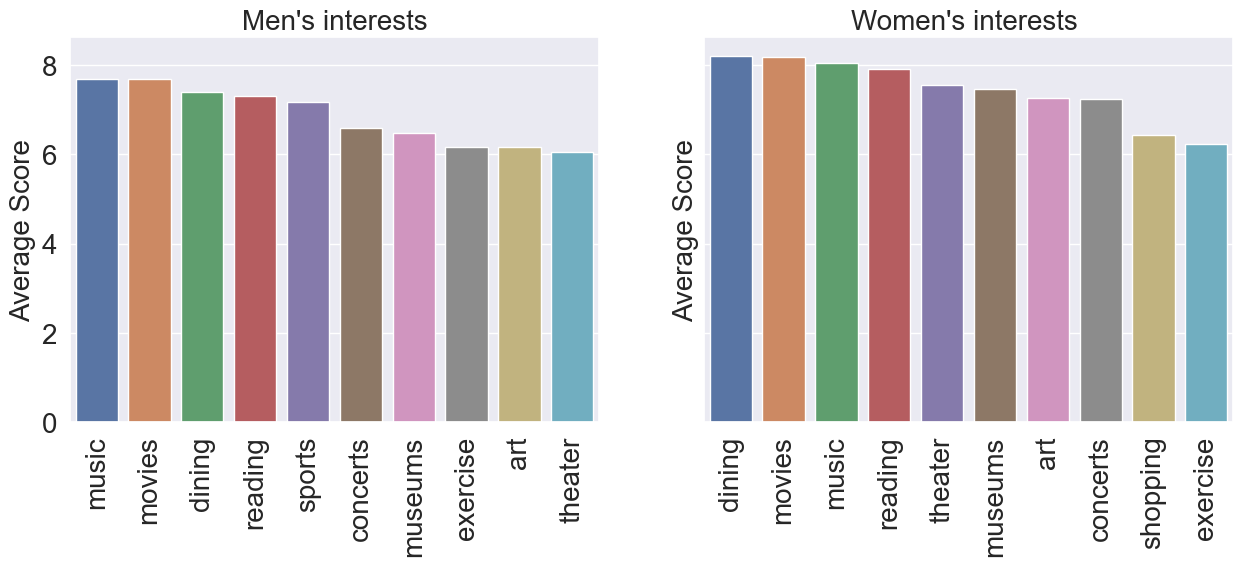

In [199]:
fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=True)

sns.barplot(data = plt_men.reset_index(), x='index', y='avg_score', ax=axs[0])
axs[0].tick_params(axis='x', labelrotation = 90, labelsize=20)
axs[0].tick_params(axis='y', labelsize=20)
axs[0].set_ylabel('Average Score', size=20)
axs[0].set_xlabel('')
axs[0].set_title('Men\'s interests', size=20)

sns.barplot(data = plt_women.reset_index(), x='index', y='avg_score', ax=axs[1])
axs[1].tick_params(axis='x', labelrotation = 90, labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[1].set_ylabel('Average Score', size=20)
axs[1].set_xlabel('')
axs[1].set_title('Women\'s interests ', size=20)

plt.savefig('interests.pdf')

In [124]:
data

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,...,shopping,yoga,expected_happy_with_sd_people,expected_num_matches,like,met,decision,decision_o,match,id_col
74,1.0,female,25.0,24.0,European/Caucasian-American,Latino/Hispanic American,0,1.0,1.0,Masters in Public Administration,...,8.0,6.0,6.0,-1.0,6.0,0.0,b'1',b'1',1,74
75,1.0,female,25.0,25.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,8.0,6.0,6.0,-1.0,6.0,0.0,b'1',b'1',1,74
76,1.0,female,25.0,30.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,8.0,6.0,6.0,-1.0,6.0,0.0,b'1',b'0',0,74
77,1.0,female,25.0,27.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,8.0,6.0,6.0,-1.0,5.0,0.0,b'1',b'1',1,74
78,1.0,female,25.0,28.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,8.0,6.0,6.0,-1.0,7.0,0.0,b'1',b'1',1,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,21.0,male,25.0,26.0,European/Caucasian-American,Latino/Hispanic American,0,1.0,1.0,Climate Dynamics,...,7.0,3.0,10.0,3.0,2.0,0.0,b'0',b'1',0,8356
8374,21.0,male,25.0,24.0,European/Caucasian-American,Other,0,1.0,1.0,Climate Dynamics,...,7.0,3.0,10.0,3.0,4.0,0.0,b'0',b'0',0,8356
8375,21.0,male,25.0,29.0,European/Caucasian-American,Latino/Hispanic American,0,1.0,1.0,Climate Dynamics,...,7.0,3.0,10.0,3.0,6.0,0.0,b'0',b'0',0,8356
8376,21.0,male,25.0,22.0,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,1.0,1.0,Climate Dynamics,...,7.0,3.0,10.0,3.0,5.0,0.0,b'0',b'1',0,8356


## Preferences

In [ ]:
# - Important to me:
#    importance_same_race, importance_same_religion, attractive_important, sincere_important, 
#    intellicence_important, funny_important, ambition_important, shared_interests_important
#- Important to partner:
#    pref_o_attractive, pref_o_sincere, pref_o_intelligence, pref_o_funny, pref_o_ambitious, pref_o_shared_interests


In [112]:
people.columns[people.columns.str.endswith('important')]

Index(['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'],
      dtype='object')

In [120]:
people[[
        'attractive_important', 'sincere_important', 
    'intellicence_important', 'funny_important',
        'ambtition_important', 'shared_interests_important']].mean(axis=0).sort_values(ascending=False)
#'importance_same_race', 'importance_same_religion',

attractive_important          24.191040
intellicence_important        20.385223
funny_important               17.430941
sincere_important             17.012426
shared_interests_important    11.187129
ambtition_important            9.926906
dtype: float64

Profiles ?

## What is most important for a match

<Axes: xlabel='interests_correlate', ylabel='Probability'>

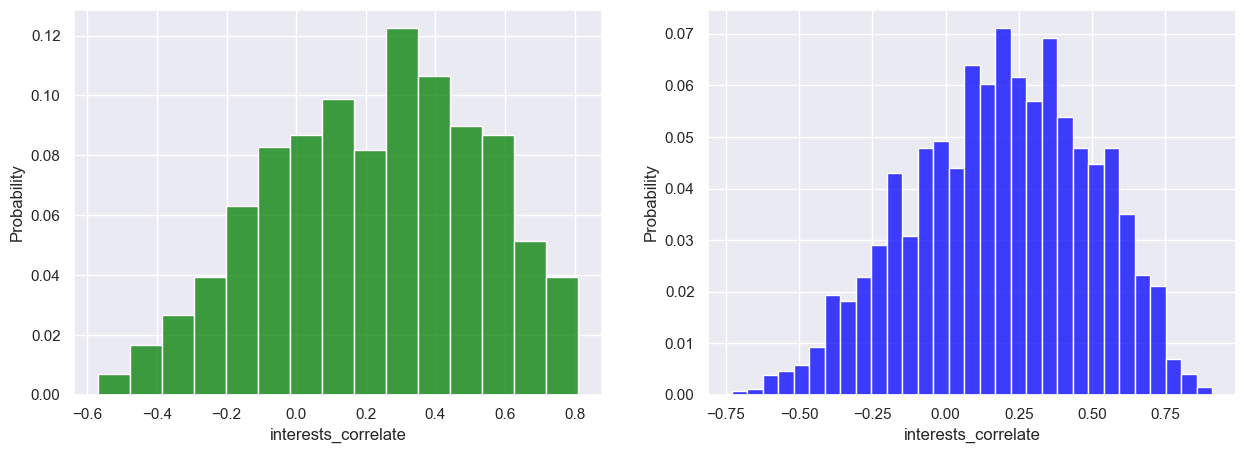

In [198]:
fig, axs=plt.subplots(1,2,figsize=(15,5), sharey=False)

sns.histplot(
    data=data[data.match=='1'],
    x='interests_correlate',
    color='green',
    ax=axs[0],
    stat='probability'
)

sns.histplot(
    data=data[data.match=='0'],
    x='interests_correlate',
    color='blue',
    ax=axs[1],
    stat='probability'
)

In [194]:
from sklearn.metrics import silhouette_score

In [195]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = pd.get_dummies(profiles, drop_first=True)
#scaler = StandardScaler().fit(X)

def scale_fct(df, scaler_):
    pd.DataFrame(scaler_.transform(df), columns=df.columns, index=df.index)

# scale_df = lambda df, scaler: pd.DataFrame(scaler.transform(df),
#                                           columns=df.columns, index=df.index)
#X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [196]:
silhouettes = []
inertias = []

for i in range(2,12):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
    preds = kmeans.fit_predict(X)
    #aggl = AgglomerativeClustering(n_clusters=5).fit(X)
    silhouettes.append(silhouette_score(X, preds))
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Intertia')

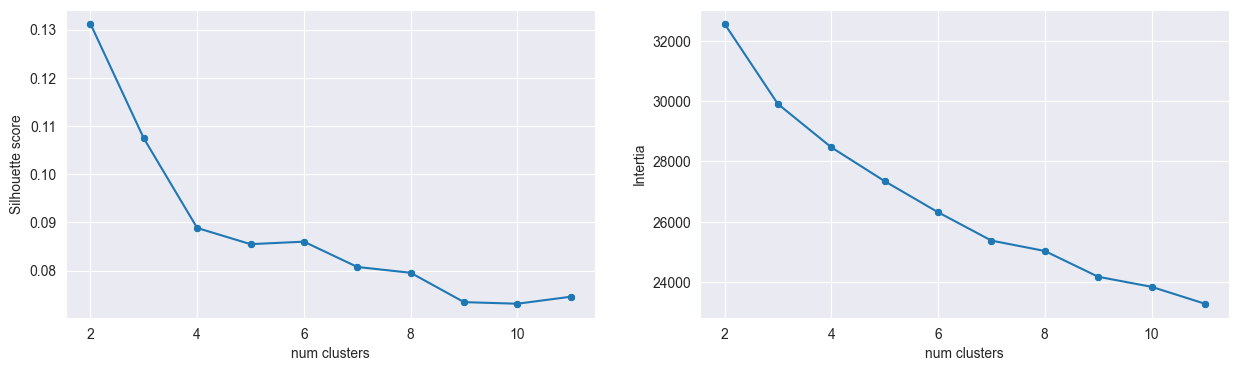

In [197]:
fig, axs = plt.subplots(1,2,figsize=(15,4))

sns.scatterplot(x=range(2,12), y=silhouettes, ax=axs[0])
sns.scatterplot(x=range(2,12), y=inertias, ax=axs[1])
sns.lineplot(x=range(2,12), y=silhouettes, ax=axs[0])
sns.lineplot(x=range(2,12), y=inertias, ax=axs[1])

axs[0].set_xlabel('num clusters')
axs[0].set_ylabel('Silhouette score')

axs[1].set_xlabel('num clusters')
axs[1].set_ylabel('Intertia')

In [204]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
aggl = AgglomerativeClustering(n_clusters=5).fit(X)

In [205]:
profiles = profiles.assign(cluster = kmeans.labels_)
profiles = profiles.assign(aggl_cluster = aggl.labels_)

In [206]:
profiles.groupby('cluster').agg(['mean', 'std'])

sports             museums            tvsports            exercise  \
             mean       std      mean       std      mean       std      mean   
cluster                                                                         
0        3.949495  2.072038  6.707071  1.808441  2.464646  1.611902  4.454545   
1        7.587629  1.929770  7.855670  1.689364  7.020619  2.155320  7.443299   
2        8.109091  1.610433  5.209091  1.807708  5.927273  2.583324  6.681818   
3        5.602041  2.689191  8.265306  1.335873  2.693878  1.575640  6.173469   

                     dining            ...  concerts            shopping  \
              std      mean       std  ...      mean       std      mean   
cluster                                ...                                 
0        2.572511  7.666667  1.737932  ...  6.393939  2.088932  5.626263   
1        1.920119  8.494845  1.300030  ...  7.969072  1.648570  6.938144   
2        2.132887  6.590909  1.788318  ...  5.509091  1.971101  4.045455   
3        2.333201  8.551020  1.573770  ...  7.918367  1.678693  6.122449   

                      music                yoga           aggl_cluster  \
              std      mean       std      mean       std         mean   
cluster                                                                  
0        2.659545  7.474747  1.473185  3.252525  2.172854     0.464646   
1        2.159352  8.484536  1.458548  5.226804  2.506264     2.216495   
2        2.100181  7.154545  1.921326  2.827273  2.153977     1.754545   
3        2.500579  8.367347  1.852208  6.551020  2.368707     0.846939   

                   
              std  
cluster            
0        0.746600  
1        1.156745  
2        0.930486  
3        1.633111  

[4 rows x 36 columns]

In [207]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca_plot = pca.fit_transform(X)

In [208]:
pca_df = pd.DataFrame(pca_plot, columns=['x', 'y']).assign(cluster = kmeans.labels_, aggl_cluster = aggl.labels_)

Text(0.5, 1.0, 'Agglomerative')

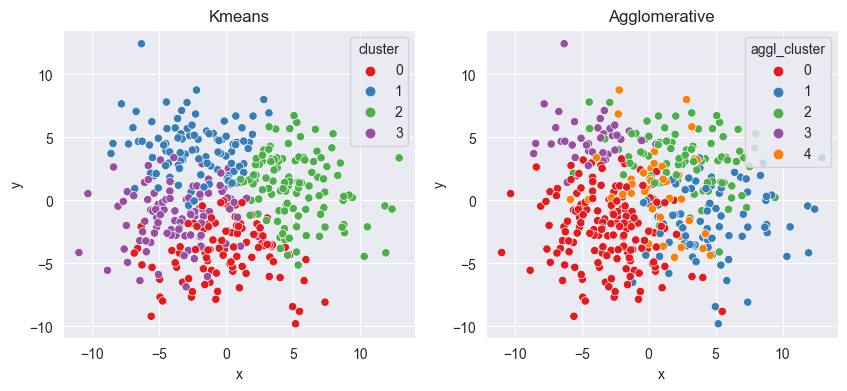

In [209]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

sns.scatterplot(data=pca_df,
                x='x', y='y', hue='cluster', ax=axs[0], palette='Set1')
axs[0].set_title('Kmeans')

sns.scatterplot(data=pca_df,
                x='x', y='y', hue='aggl_cluster', ax=axs[1], palette='Set1')
axs[1].set_title('Agglomerative')

<Axes: >

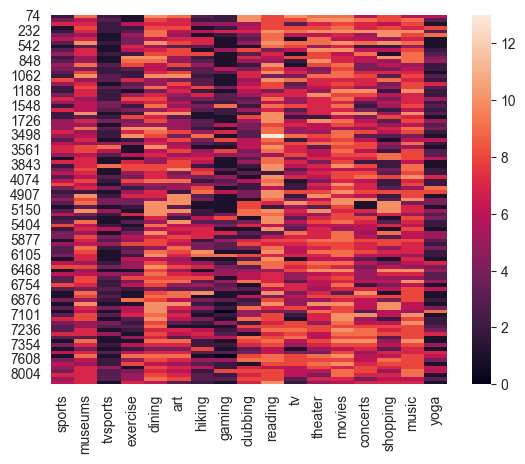

In [211]:
sns.heatmap(profiles[profiles.cluster==0].drop(columns=['cluster', 'aggl_cluster']))

In [213]:
c1 = profiles[profiles.cluster==0][profiles[profiles.cluster==0].mean().sort_values(ascending=False)[0:10].index]
c2 = profiles[profiles.cluster==1][profiles[profiles.cluster==1].mean().sort_values(ascending=False)[0:10].index]
c3 = profiles[profiles.cluster==2][profiles[profiles.cluster==2].mean().sort_values(ascending=False)[0:10].index]
c4 = profiles[profiles.cluster==3][profiles[profiles.cluster==3].mean().sort_values(ascending=False)[0:10].index]
#c5 = profiles[profiles.cluster==4][profiles[profiles.cluster==4].mean().sort_values(ascending=False)[0:10].index]
#c6 = profiles[profiles.cluster==5][profiles[profiles.cluster==5].mean().sort_values(ascending=False)[0:10].index]

<Axes: >

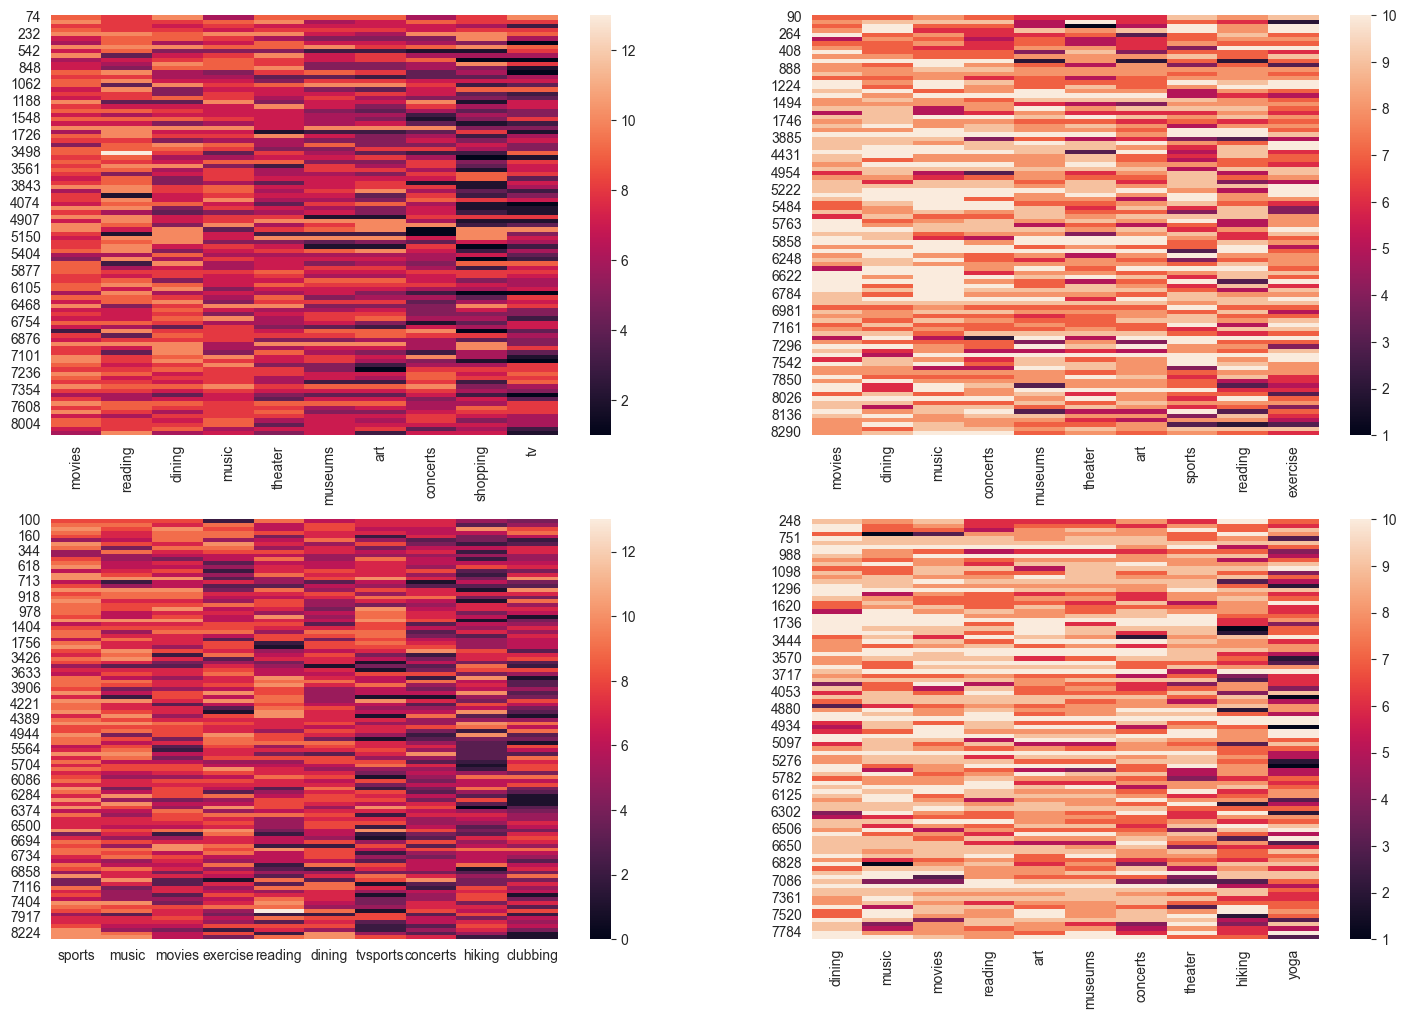

In [214]:
fig, axs = plt.subplots(2,2, figsize=(18,12))

sns.heatmap(c1, ax=axs[0,0])

sns.heatmap(c2, ax=axs[0,1])

sns.heatmap(c3, ax=axs[1,0])

sns.heatmap(c4, ax=axs[1,1])

#sns.heatmap(c5, ax=axs[1,1])

#sns.heatmap(c6, ax=axs[1,2])

<Axes: >

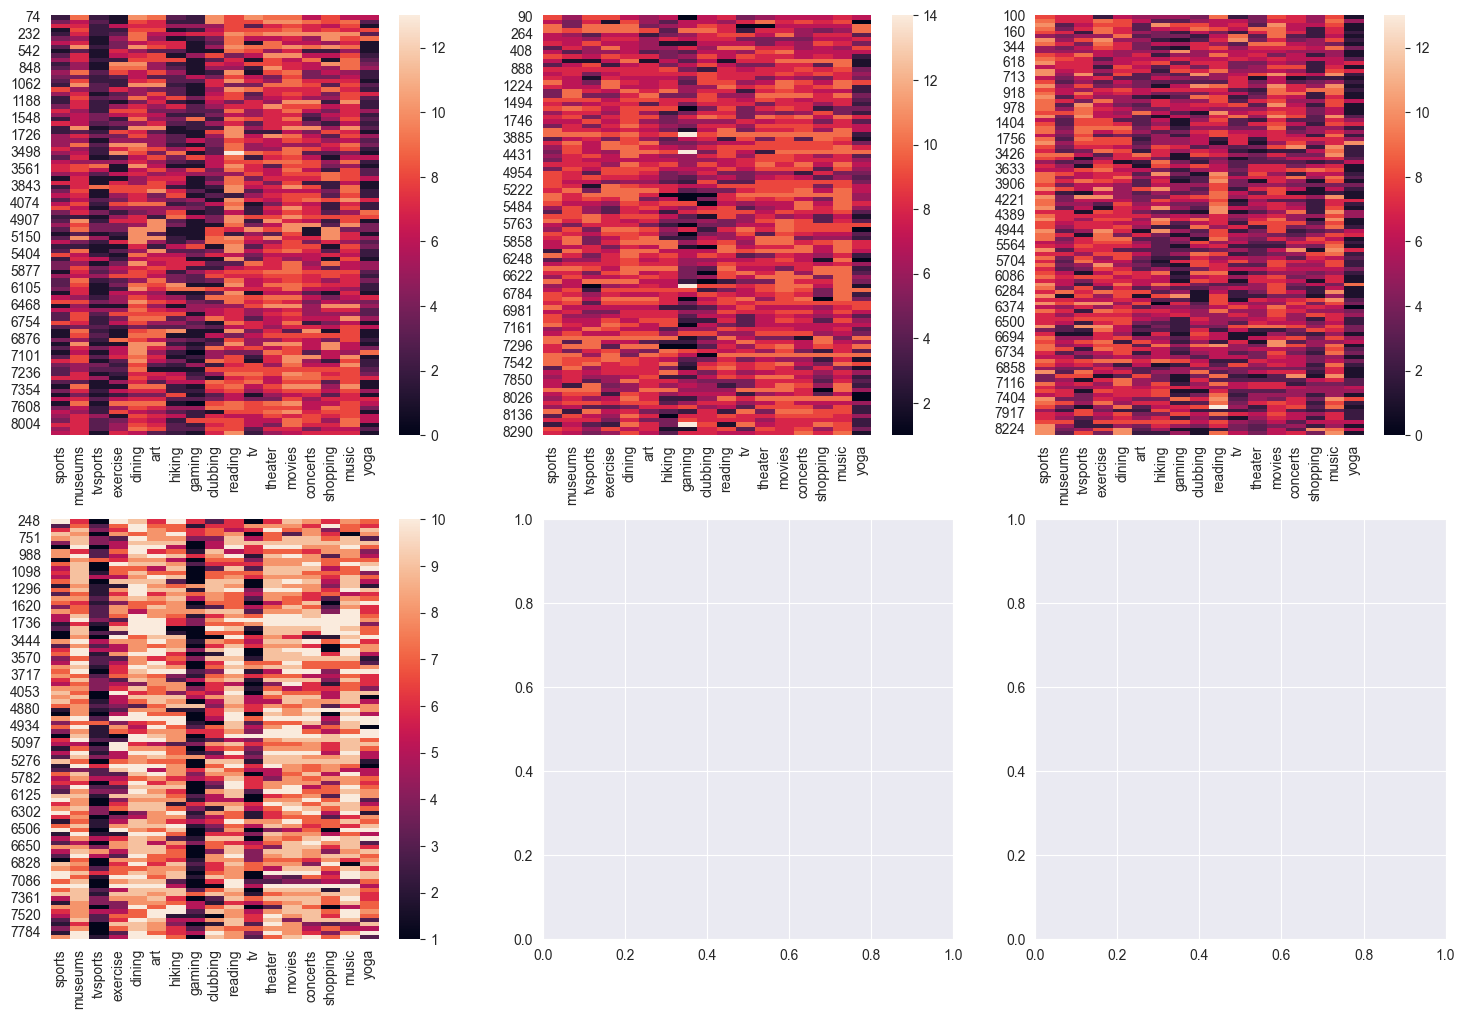

In [215]:
fig, axs = plt.subplots(2,3, figsize=(18,12))

sns.heatmap(profiles[profiles.cluster==0].drop(columns=['cluster', 'aggl_cluster']), ax=axs[0,0])

sns.heatmap(profiles[profiles.cluster==1].drop(columns=['cluster', 'aggl_cluster']), ax=axs[0,1])

sns.heatmap(profiles[profiles.cluster==2].drop(columns=['cluster', 'aggl_cluster']), ax=axs[0,2])

sns.heatmap(profiles[profiles.cluster==3].drop(columns=['cluster', 'aggl_cluster']), ax=axs[1,0])

#sns.heatmap(profiles[profiles.cluster==4].drop(columns=['cluster', 'aggl_cluster']), ax=axs[1,1])

#sns.heatmap(profiles[profiles.cluster==5].drop(columns=['cluster', 'aggl_cluster']), ax=axs[1,2])

## Basic EDA

In [4]:
perc_women = len(people[people.gender=='female']) / len(people) * 100
perc_men = len(people[people.gender!='female']) / len(people) * 100

print(f'{perc_women:.2f}% of the participants were women')
print(f'{perc_men:.2f}% of the participants were men')

,sports,museums,tvsports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,shopping,music,yoga
index,,,,,,,,,,,,,,,,,
74,2.0,9.0,2.0,1.0,10.0,9.0,3.0,2.0,10.0,8.0,10.0,9.0,9.0,6.0,8.0,6.0,6.0
80,4.0,6.0,3.0,1.0,8.0,7.0,2.0,2.0,10.0,8.0,8.0,10.0,10.0,9.0,8.0,9.0,3.0
90,9.0,6.0,9.0,9.0,7.0,6.0,7.0,1.0,7.0,8.0,5.0,6.0,7.0,7.0,7.0,8.0,7.0
100,8.0,7.0,7.0,2.0,6.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,5.0,8.0,1.0
110,9.0,7.0,7.0,9.0,8.0,6.0,3.0,3.0,5.0,6.0,6.0,4.0,7.0,7.0,5.0,9.0,5.0


In [5]:
dates = data.assign(
    decision = (data.decision=='b\'1\'')*1,
    decision_o = (data.decision_o=='b\'1\'')*1
)

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,...,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,met,decision,decision_o,match,id_col
index,,,,,,,,,,,,,,,,,,,,,
74,1.0,female,25.0,24.0,European/Caucasian-American,Latino/Hispanic American,0,1.0,1.0,Masters in Public Administration,...,6.0,-0.23,6.0,-1.0,6.0,0.0,b'1',b'1',1,74
75,1.0,female,25.0,25.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,0.28,6.0,-1.0,6.0,0.0,b'1',b'1',1,74
76,1.0,female,25.0,30.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,0.05,6.0,-1.0,6.0,0.0,b'1',b'0',0,74
77,1.0,female,25.0,27.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,0.17,6.0,-1.0,5.0,0.0,b'1',b'1',1,74
78,1.0,female,25.0,28.0,European/Caucasian-American,European/Caucasian-American,1,1.0,1.0,Masters in Public Administration,...,6.0,-0.47,6.0,-1.0,7.0,0.0,b'1',b'1',1,74


In [119]:
successes = len(data[data.match=='1']) / len(data) * 100
(f'{successes:.2f}% of dates resulted in a match')

'17.18% of dates resulted in a match'

In [148]:
plt_df = dates[dates.gender=='female']
plt_df.groupby(['decision', 'decision_o']).count().gender

decision  decision_o
0         0             908
          1             872
1         0             636
          1             499
Name: gender, dtype: int64

In [152]:
both_no = len(plt_df[(plt_df.decision==0) & (plt_df.decision_o==0)]) / len(plt_df) * 100
woman_no = len(plt_df[(plt_df.decision==0) & (plt_df.decision_o==1)]) / len(plt_df) * 100
man_no = len(plt_df[(plt_df.decision==1) & (plt_df.decision_o==0)]) / len(plt_df) * 100
both_yes = len(plt_df[(plt_df.decision==1) & (plt_df.decision_o==1)]) / len(plt_df) * 100

print(f'On {both_no:.2f}% of the dates, both participants said no to a future date')
print(f'On {woman_no:.2f}% of the dates, the woman said no to a future date')
print(f'On {man_no:.2f}% of the dates, the man said no to a future date')
print(f'On {both_yes:.2f}% of the dates, both participants said yes to a future date')

On 31.15% of the dates, both participants said no to a future date
On 29.91% of the dates, the woman said no to a future date
On 21.82% of the dates, the man said no to a future date
On 17.12% of the dates, both participants said yes to a future date


In [154]:
women_yes = len(plt_df[plt_df.decision==1]) / len(plt_df) * 100
men_yes = len(plt_df[plt_df.decision_o==1]) / len(plt_df) * 100

print(f'on {women_yes:.2f}% of the dates, the woman said yes')
print(f'on {men_yes:.2f}% of the dates, the man said yes')

on 38.94% of the dates, the woman said yes
on 47.03% of the dates, the man said yes


In [153]:
both_no + woman_no + man_no + both_yes

100.0

In [141]:
pltt = pd.concat([plt_df[['decision']].assign(gender='female'),
          plt_df[['decision_o']].rename({'decision_o':'decision'}, axis=1).assign(gender='male')], axis=0)

In [217]:
people.field.value_counts().sort_values(ascending=False)

Law                       28
MBA                       26
Business                  24
Social Work               23
Electrical Engineering    10
                          ..
biochemistry/genetics      1
International affairs      1
Biotechnology              1
Stats                      1
Climate Dynamics           1
Name: field, Length: 198, dtype: int64

In [222]:
people[people.gender=='female'].field.value_counts().sort_values(ascending=False)

Social Work               22
Law                       10
Psychology                 5
School Psychology          4
Business                   4
                          ..
epidemiology               1
journalism                 1
MFA Acting Program         1
Nonfiction writing         1
Mechanical Engineering     1
Name: field, Length: 127, dtype: int64

In [223]:
people[people.gender=='male'].field.value_counts().sort_values(ascending=False)

MBA                                           24
Business                                      20
Law                                           18
Electrical Engineering                         8
International Affairs                          6
                                              ..
ELECTRICAL ENGINEERING                         1
Masters of Industrial Engineering              1
Industrial Engineering/Operations Research     1
Industrial Engineering                         1
Climate Dynamics                               1
Name: field, Length: 100, dtype: int64

In [218]:
people.field.nunique()

198

<Axes: xlabel='field', ylabel='Frequency'>

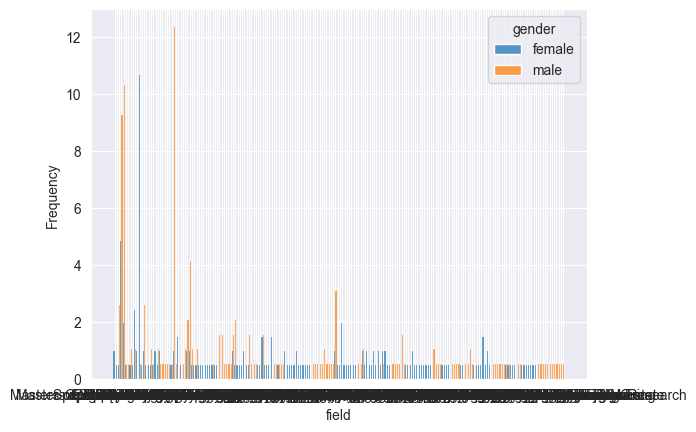

In [221]:
sns.histplot(
    data=people,
    x='field',
    stat='frequency',
    hue='gender',
    multiple='dodge'
)

<Axes: xlabel='decision', ylabel='Frequency'>

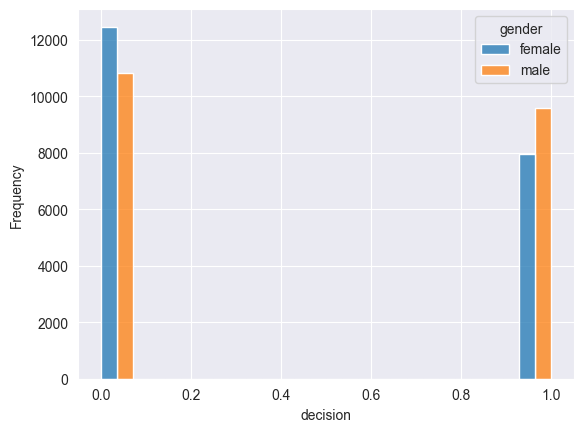

In [145]:
sns.histplot(
    data=pltt,
    x='decision',
    hue='gender',
    multiple='dodge',
    stat='frequency'
)